
## Lecturer : Prof. Jeff Edmonds

In [37]:
 import keras
keras.__version__

'2.11.0'

In [38]:
#Import the necessary libraries
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [39]:
#Importation of the data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [40]:
#We reshape the data set and transform the values to scale them between 0 and 1. 
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels.

In [41]:

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# **Assignment 1**

---

**1. What does the output of the cell below tell us?** (1 Mark)

In [35]:
train_labels[300]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

It tells us that after scaling the training set the number at the 301 th position correspond to 8 since at its brightness is 1 and the other values are 0.

**2. Why does the last layer of the network we trained above have 10 nodes? Why does it have to have that many?** (1 Mark)

The last layer of the network has 10 nodes because we have 10 classes which corresponds to number between 0 and 9. And at the end of each classification, the neural network has to give a probability score that the initial image correspond to each of those numbers. Each score will be the probability that the current digit image belongs to one of our 10 digit classes, thus it has to be that many because we are in a multi-classification problem.

**3. How many nodes does the input layer have? Why does it have to have that many?** (1 Mark)

The input node has $28 \times 28 = 784$ nodes. It has to be that many because every pictures has 28*28 = 784 pixels, so to be able to classify to which classes the current digit image digit corresponds, we have to analyze each pixel to extract the maximum of information.

**4. How many nodes does the hidden layer have? Could it have had a different number? (hint: try it out)** (1 Mark)

The hidden layer has 512 nodes. Yes it could have had a different number since it is an hyperparameter. Let's check how it works with 300 nodes in the hidden layer.




In [52]:
network1 = models.Sequential()
network1.add(layers.Dense(300, activation='relu', input_shape=(28 * 28,)))
network1.add(layers.Dense(10, activation='softmax'))

network1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2895 - accuracy: 0.9191
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1254 - accuracy: 0.9635
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0842 - accuracy: 0.9744
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0632 - accuracy: 0.9815
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0484 - accuracy: 0.9857


In [53]:
test_loss_1, test_acc_1 = network1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9767


In [54]:
print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


We have a result of accuracy on the training and test set when we change the number of nodes in the hidden layer but the number of total parameters remain the same whether we consider 512 nodes or 300 nodes on that hidden layer. 

**5. Train the model we trained above for another 10 [epochs](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/) (Note, an epoch is a single iteration over all samples in the dataset). Does the model improve from the additional training?** (1 Mark)

hint: Find the epoch variable and change its value. Notice that if you run the training cell another 2 times in a row you will achieve the same result.


In [36]:
##Build the neural network

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])
earlyStopCallBack = EarlyStopping(monitor='loss', patience=3)
history_1 = network.fit(train_images, train_labels, validation_data=
                        (test_images, test_labels), epochs = 20, batch_size = 128, callbacks=[earlyStopCallBack])

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 4.8488e-05 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9864
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 2.7984e-05 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9859
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 2.2282e-05 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9861
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 1.8733e-05 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 0.9866
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 1.5989e-05 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 0.9862
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 1.3708e-05 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 0.9866
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 1.1931e-05 - accuracy: 1.0000 - val_loss: 0.01

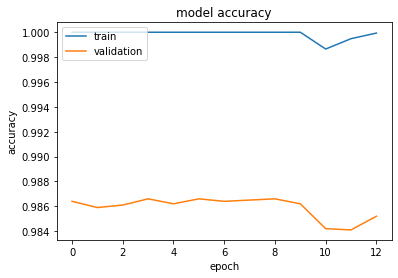

In [44]:
#summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


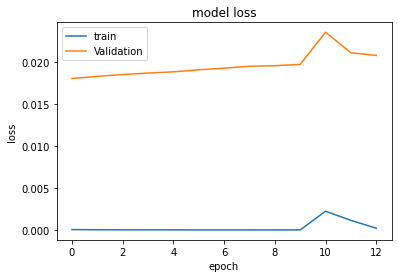

In [45]:
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

After doing an additional 10 epochs, the loss functions of the training set and the validation set seem to increase and the accuracy during the training is still higher than the accuracy during the validation. That simple means that the machine has learn to much from the data to the point to capture the noise and is not able to perform well with a new data. Then there is an overfitting problem.

**6. Modify the code below so that it uses stochastic gradient descent as the optimizer instead of rmsprop. Which results in better performance on this dataset after 5 epochs, SGD or rmsprop? How do you know?** (2 Marks)

In class we have discussed gradient descent. Gradient descent is the fundamental optimization method for neural networks, but there are more advanced optimization techniques that build on it, such as rmsprop (which was used in the model we trained above). Don't worry about understanding these advanced optimizers for this course - just remember that they exist and are serving the same role as gradient descent, but with some modifications.


hint: use 'sgd' to indicate stochastic gradient descent in the code. Also make sure you calculate the **test** accuracy after training.


In [37]:
#The network is identical to the one we trained above. Change it to use
# stochastic gradient descent ('sgd').
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2653 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1064 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0701 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0506 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0386 - accuracy: 0.9886


In [38]:
#accuracy on the test set with "rmsprop" optimizer
test_loss, test_acc = network2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9797


In [39]:
#Computation with the "sgd" optimizer.
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network2.add(layers.Dense(10, activation='softmax'))

In [40]:
network2.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 1.1076 - accuracy: 0.7538
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5217 - accuracy: 0.8734
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4196 - accuracy: 0.8906
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3730 - accuracy: 0.8998
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3445 - accuracy: 0.9060


In [41]:
#accuracy on the test set with "sgd" optimizer
test_loss, test_acc = network2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.9144


After 5 epochs, we have a better performance of our model when the optimizer is stochastic gradient descent. By analyzing the results, we notice that in the latter case, the accuracy during the testing is higher than the accuracy during the training which is the opposite when we run our model with the rmsprop optimizer. We can conclude that using rmsprop made the model to complex for our data set and then using stochastic gradient descent is a better fit.


**7. What dimension tensors are our train_labels and train_images variables?** (1 mark)

Our data is stored in Numpy arrays. In general, neural networks use data that is stored in Tensors, which is a term for a container for numbers. Unlike a vector (which is a 1 dimensional tensor) or matrix (2D tensor), a tensor can have an arbitrary number of dimensions. In working with Keras in this course, our tensors are Numpy arrays with a varying number of dimensions.


In [42]:
train_images.ndim

2

In [43]:
train_labels.ndim

2

The dimension tensors of our train_labels is 2D and for the train_images is 2D. 

**8. Create a new neural network with between 2 and 4 hidden layers, and fewer than 256 nodes per layer. Report the training and test accuracy after 3 and 5 epochs of training respectively. Also report the number of layers and number of nodes per layer that you used to acheive these results.** (4 marks)

If you want, you are welcome to experiment with other aspects of the network such as optimizers (e.g. 'adam') or different activation functions (e.g. sigmoid).

In [43]:
train_images.shape[1]

784

In [55]:
#Case of 3 epochs and 4 hidden layers
network3 = models.Sequential()

network3.add(layers.Dense(224, activation='sigmoid',input_shape=(28 * 28,)))
network3.add(layers.Dense(224, activation='sigmoid'))
network3.add(layers.Dense(224, activation='sigmoid'))
network3.add(layers.Dense(224, activation='sigmoid'))
network3.add(layers.Dense(10, activation='softmax'))

network3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network3.fit(train_images, train_labels, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 5s 8ms/step - loss: 0.8110 - accuracy: 0.7341
Epoch 2/3
469/469 [==============================] - 4s 8ms/step - loss: 0.2380 - accuracy: 0.9314
Epoch 3/3
469/469 [==============================] - 4s 8ms/step - loss: 0.1591 - accuracy: 0.9529


In [56]:
#accuracy on the test set with "adam" optimizer and after 3 epochs
test_loss_3, test_acc_3 = network3.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1468 - accuracy: 0.9566


In [57]:
print(network3.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 224)               175840    
                                                                 
 dense_19 (Dense)            (None, 224)               50400     
                                                                 
 dense_20 (Dense)            (None, 224)               50400     
                                                                 
 dense_21 (Dense)            (None, 224)               50400     
                                                                 
 dense_22 (Dense)            (None, 10)                2250      
                                                                 
Total params: 329,290
Trainable params: 329,290
Non-trainable params: 0
_________________________________________________________________
None


For the first experimentation, we have considered a neural network with 4 hidden layers, 1 input layer and 1 output layer. The input layer had 784 nodes and the 04 hidden layers had 224 nodes each while the output layer had 10 nodes. We notice that after 3 epochs the accuracy during the training is 0.9529 and during the test it is 0.9566, since we are dealing with a hude number of parameters (329,290) then the difference in accuracy is significant and the model has performed well during the training and better during the testing. This might be due to the choice of optimizer, our machine was not subject to overfitting.

In [58]:
#Case of 5 epochs and 3 hidden layers
network5 = models.Sequential()

network5.add(layers.Dense(224, activation='sigmoid',input_shape=(28 * 28,)))
network5.add(layers.Dense(224, activation='sigmoid'))
network5.add(layers.Dense(224, activation='sigmoid'))
network5.add(layers.Dense(224, activation='sigmoid'))
network5.add(layers.Dense(10, activation='softmax'))

network5.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.7994 - accuracy: 0.7448
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2219 - accuracy: 0.9344
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1544 - accuracy: 0.9540
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.1188 - accuracy: 0.9653
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0989 - accuracy: 0.9708


In [59]:
#accuracy on the test set with "adam" optimizer and after 3 epochs
test_loss_5, test_acc_5 = network5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.9694


In [60]:
print(network5.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 224)               175840    
                                                                 
 dense_24 (Dense)            (None, 224)               50400     
                                                                 
 dense_25 (Dense)            (None, 224)               50400     
                                                                 
 dense_26 (Dense)            (None, 224)               50400     
                                                                 
 dense_27 (Dense)            (None, 10)                2250      
                                                                 
Total params: 329,290
Trainable params: 329,290
Non-trainable params: 0
_________________________________________________________________
None


By increasing the number of epochs, we notice that the machine is overfitting since the accuracy during the test (0.9694) is lower than the occuracy during the training (0.9708), so increasing the number of epochs with is equivalent to increase the number of iterations and then training the model more can cause and overfitting. A way to solve this problem is to use a regularizer such as dropout where some number of layer ouputs are dropped out during the training with a certain probability (usually 0.4) or the early stopping regularizer.

**9. Imagine you have designed a machine learning system for a bank. The system uses an aritifical neural network to decide whether to approve mortages based on client income, banking and credit history, and some demographic data such as gender, ethnic background and age. The network has many layers and over 2 million parameters (weights). A client is asking you why their desired mortgage was not approved by the system and they are accusing you of discrimination based on gender. What level of detail are you able to provide them in your response by simply looking at the values of your weights? Can you easily check whether your model is making decisions based on their gender? Why or why not?** (3 marks)


Eventhough Artificial Neural Network is one of the best machine learning model for prediction, in terms of the accuracy it provides compare to others and its robustness, it is still difficult to understand what happens along the training/prediction process. In fact, ANN operate as a black box and is still heavily limited by it. But for what we know, the value of initial weight have a huge impact on the future prediction independently of the optimizer and the activation function chose.

Moreover, in neural network, the gradient of the output can be used to identify specific weights that contribute the most to the prediction and unfortunately may be a certain level of gender (male or female) contribute the most during the process or another input variable is biased; that can also have and impact on the final prediction. It is quite impossible to know. In the other hand, if the weights corresponding to the different level of gender a relatively low, we can tell to our customer with a certain level of confidence that our prediction is gender discrimination free and he/she was not selected may be due to another parameter , may be his/her income is low or he/she is too old. 

The fact that the ANNs act as a black box provide little to zero explanation on why some features are favored over others by the model during the training.In other terms, we do not know how the correlations in the training data are represented in the choice of features for the prediction.

Using activation functions add non-linearities into the features at each layer, so it will be difficult to check which features are really used for the prediction. Thus, we can not easily check whether our model is making decisions based on their gender. 

Finally, we can still try to permutate the observations of features in between each client to evaluate if one feature is more important in the prediction than the others but if the column gender was unbalanced (significant difference in proportion of male and female), the model will not work well in terms of prediction. To solve it we can choose to assign the gender that is less represented in the data set to the data of that client and check how it affects the prediction, if it changes and estimate than the client deserves a mortgage so  there is a high chance that the model makes decisions based on gender. 